In [ ]:
!pip install extra-keras-datasets

In [ ]:
# 🛠️ Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from extra_keras_datasets import emnist


In [ ]:
# Load the digit dataset (0 to 9)
(digits_train_images, digits_train_labels), (digits_test_images, digits_test_labels) = mnist.load_data()

# Normalize pixel values to [0, 1]
digits_train_images = digits_train_images.reshape(-1, 28, 28, 1) / 255.0
digits_test_images = digits_test_images.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot format
digits_train_labels = to_categorical(digits_train_labels, 10)
digits_test_labels = to_categorical(digits_test_labels, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Load training data
train_data = pd.read_csv('emnist-letters-train.csv.zip', header=None)
test_data = pd.read_csv('emnist-letters-test.csv.zip', header=None)

# Split features and labels
x_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values - 1  # Adjust labels from 1–26 to 0–25

x_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values - 1

# Normalize and reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 26)
y_test = to_categorical(y_test, 26)


In [ ]:
# If images appear rotated, apply correction
x_train = np.rot90(x_train, k=1, axes=(1, 2))
x_test = np.rot90(x_test, k=1, axes=(1, 2))


In [ ]:
def build_cnn_model(num_classes):
    model = Sequential()

    # First Convolution Layer
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second Convolution Layer
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the 2D feature maps into 1D
    model.add(Flatten())

    # Dense layer with dropout to reduce overfitting
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.4))  # More human, less robotic model

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
digit_model = build_cnn_model(10)

print("🧪 Training on digit data (MNIST)...")
digit_model.fit(digits_train_images, digits_train_labels, epochs=5, validation_data=(digits_test_images, digits_test_labels))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🧪 Training on digit data (MNIST)...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.8784 - loss: 0.3814 - val_accuracy: 0.9861 - val_loss: 0.0405
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9791 - loss: 0.0682 - val_accuracy: 0.9904 - val_loss: 0.0270
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9852 - loss: 0.0487 - val_accuracy: 0.9915 - val_loss: 0.0246
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9887 - loss: 0.0366 - val_accuracy: 0.9929 - val_loss: 0.0228
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9932 - val_loss: 0.0232


In [ ]:
# Use the correctly named variables for EMNIST from CSV
letter_model = build_cnn_model(26)

print("🧪 Training on letter data (EMNIST)...")
letter_model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


🧪 Training on letter data (EMNIST)...
Epoch 1/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 91s 32ms/step - accuracy: 0.6729 - loss: 1.0830 - val_accuracy: 0.8900 - val_loss: 0.3313
Epoch 2/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 88s 32ms/step - accuracy: 0.8755 - loss: 0.3859 - val_accuracy: 0.9126 - val_loss: 0.2585
Epoch 3/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 143s 32ms/step - accuracy: 0.9001 - loss: 0.3069 - val_accuracy: 0.9138 - val_loss: 0.2507
Epoch 4/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 140s 32ms/step - accuracy: 0.9112 - loss: 0.2664 - val_accuracy: 0.9151 - val_loss: 0.2574
Epoch 5/5
2775/2775 ━━━━━━━━━━━━━━━━━━━━ 91s 33ms/step - accuracy: 0.9191 - loss: 0.2430 - val_accuracy: 0.9222 - val_loss: 0.2280


In [ ]:
digit_accuracy = digit_model.evaluate(digits_test_images, digits_test_labels)[1]
letter_accuracy = letter_model.evaluate(x_test, y_test)[1]

print(f"✅ Digit model accuracy: {digit_accuracy:.2%}")
print(f"✅ Letter model accuracy: {letter_accuracy:.2%}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9916 - loss: 0.0279
463/463 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9321 - loss: 0.2166
✅ Digit model accuracy: 99.32%
✅ Letter model accuracy: 92.22%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


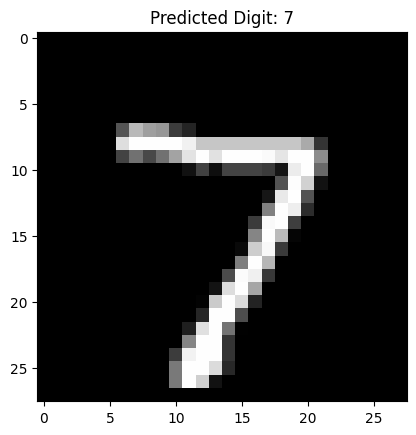

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


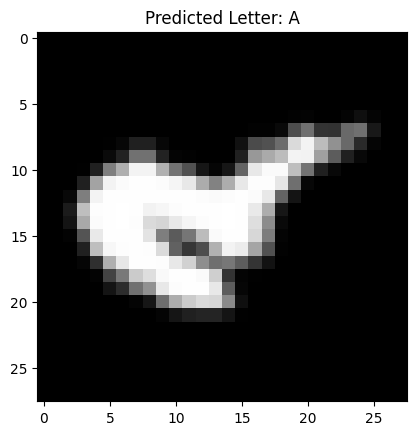

In [ ]:
# Predict and show a digit
sample_digit = digits_test_images[0]
pred_digit = np.argmax(digit_model.predict(sample_digit.reshape(1, 28, 28, 1)))
plt.imshow(sample_digit.squeeze(), cmap='gray')
plt.title(f"Predicted Digit: {pred_digit}")
plt.show()

# Predict and show a letter
# Using x_test as a temporary workaround since letters_test_images was not defined due to download issues
sample_letter = x_test[0]
pred_letter = np.argmax(letter_model.predict(sample_letter.reshape(1, 28, 28, 1)))
plt.imshow(sample_letter.squeeze(), cmap='gray')
plt.title(f"Predicted Letter: {chr(pred_letter + 65)}")
plt.show()

In [ ]:
digit_model.save("digit_cnn_model.h5")
letter_model.save("letter_cnn_model.h5")
